In [2]:
# import pandas as pd
# import numpy as np

# # 1. Load kedua dataset
# # Ganti path sesuai dengan lokasi file Anda
# df_dataset2 = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\dataset berita terkini 2\data_compressed.csv.gz', compression='gzip')
# df_dataset3 = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\dataset berita terkini 3\politik_merge_compressed.csv.gz', compression='gzip')

# # 2. Sesuaikan nama kolom agar konsisten
# # Berdasarkan dataset yang Anda upload, dataset2 memiliki kolom 'content' dan 'title'
# # Sedangkan dataset3 memiliki kolom 'Content' dan 'Judul'
# df_dataset3 = df_dataset3.rename(columns={'Content': 'content', 'Judul': 'title', 'Waktu': 'date'})

# # 3. Pilih hanya kolom yang dibutuhkan
# df_dataset2 = df_dataset2[['content', 'title', 'date']]
# df_dataset3 = df_dataset3[['content', 'title', 'date']]

# # # 4. Hapus duplikat dan nilai kosong dari kedua dataset
# # df_dataset2 = df_dataset2.drop_duplicates(subset=['content'])
# # df_dataset2 = df_dataset2.dropna(subset=['content', 'title'])

# # df_dataset3 = df_dataset3.drop_duplicates(subset=['content'])
# # df_dataset3 = df_dataset3.dropna(subset=['content', 'title'])

# # 5. Ambil 3500 sampel dari masing-masing dataset
# sample_size = 3000
# df_sample2 = df_dataset2.sample(n=sample_size, random_state=42)
# df_sample3 = df_dataset3.sample(n=sample_size, random_state=42)

# # 6. Gabungkan kedua sampel
# df_combined = pd.concat([df_sample2, df_sample3], ignore_index=True)

# # 7. Acak dataset gabungan untuk memastikan data tercampur dengan baik
# df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# # 8. Simpan dataset gabungan ke file CSV
# df_combined.to_csv('berita_terkini.csv', index=False)

# # 9. Tampilkan informasi dataset
# print(f"Jumlah data dari dataset2: {len(df_sample2)}")
# print(f"Jumlah data dari dataset3: {len(df_sample3)}")
# print(f"Jumlah data pada dataset gabungan: {len(df_combined)}")
# print("\nContoh 5 baris data dari dataset gabungan:")
# df_combined

In [3]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from indonesian_number_normalizer import create_normalizer
from tqdm import tqdm

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
normalizer = create_normalizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini.csv')
df

,content,title,date
0,"Presiden bertemu dengan timnas U-20 di GBK, Se...",Jokowi: Beberapa Pemain Timnas U-20 Ingin Kuli...,2023-04-01 10:36:35+00
1,Presiden Joko Widodo (Jokowi) melakukan kunjun...,"Kunker ke Lampung, Jokowi Akan Resmikan Bendun...","Senin, 26 Agu 2024 08:53 WIB"
2,"Menteri Koordinator Politik, Hukum, dan Keaman...","Mahfud Buat Satgas Tindak Lanjuti Rp 349 T, Di...",2023-04-10 05:28:58+00
3,JAKARTA - Cara tambah daya listrik hingga 5.50...,Tambah Daya Listrik hingga 5.500 VA dengan Bay...,2023-03-23 02:41:24+00
4,Sekretaris Jenderal PBNU Gus Saifullah Yusuf (...,"Sekjen PBNU: Hubungan Santri dan Polri Baik, S...","Selasa, 03 Sep 2024 12:43 WIB"
...,...,...,...
5995,"TEMPO.CO, Jakarta - Tim Pembela Prabowo-Gibran...","Hari Ini, Kubu Prabowo-Gibran Bakal Hadirkan 1...",4/4/2024
5996,Bakal calon Wakil Gubernur DKI Jakarta Rano Ka...,Rano Karno Ungkap Obrolan dengan Anies di Kant...,"Rabu, 28 Agu 2024 12:16 WIB"
5997,Lembaga Survei Indonesia (LSI) mengungkapkan b...,"Buah Kerja Keras Airin, Unggul di Semua Simula...","Kamis, 22 Agu 2024 11:45 WIB"
5998,"JAKARTA, KOMPAS.com - Jaksa Penuntut Umum (JP...","Jaksa Bocorkan ""Chat"" Gazalba dengan Perempuan...",8/8/2024


In [6]:
df = df.drop_duplicates(subset=['content']).reset_index(drop=True).copy(deep=True)
print(f"Dataset setelah dibersihkan memiliki {len(df)} baris")

Dataset setelah dibersihkan memiliki 5951 baris


PRE PROCESSING

In [7]:
def cleaning(teks):
    if not isinstance(teks, str):
        return ""
    teks = re.sub(r'<.*?>', ' ', teks)
    teks = re.sub(r'https?://\S+|www\.\S+', ' ', teks)
    teks = re.sub(r'ADVERTISEMENT.*?CONTENT', ' ', teks, flags=re.IGNORECASE | re.DOTALL)
    teks = re.sub(r'[^\w\s\d]', ' ', teks)
    teks = re.sub(r'\s+', ' ', teks).strip()
    return teks
df['cleaned_text'] = df['content'].fillna('').apply(cleaning)

In [8]:
def case_folding(teks):
    return teks.lower()
df['case_folded_text'] = df['cleaned_text'].apply(case_folding)

In [9]:
def normalisasi(teks):
    # Normalisasi angka (misalnya "100 juta" menjadi "seratus juta")
    try:
        # Gunakan normalize_text dari instance normalizer
        teks = normalizer.normalize_text(teks)
    except Exception as e:
        print(f"Error saat normalisasi angka: {e}")
        pass
    slang_dict = {
        'dgn': 'dengan',
        'tdk': 'tidak',
        'tsb': 'tersebut',
        'utk': 'untuk',
        'spy': 'supaya',
        'krn': 'karena',
        'jg': 'juga',
        'bs': 'bisa',
        'sdh': 'sudah',
        'blm': 'belum',
        'org': 'orang',
        'yg': 'yang',
        'sy': 'saya',
        'dlm': 'dalam',
        'pd': 'pada',
        'dr': 'dari',
        'kmrn': 'kemarin',
        'skrg': 'sekarang',
        'hrs': 'harus',
        'msk': 'masuk',
        'trs': 'terus',
        'tp': 'tapi',
        'kalo': 'kalau',
        'gak': 'tidak',
        'ga': 'tidak',
        'ngga': 'tidak',
        'gk': 'tidak',
        'thn': 'tahun',
        'bln': 'bulan',
        'sblm': 'sebelum',
        'stlh': 'setelah',
        'milyar': 'miliar',
        'trilliun': 'triliun',
        'jt': 'juta',
        'rb': 'ribu',
        '%': 'persen',
        'usd': 'dolar amerika',
        'rupiah': 'rupiah',
        'rp': 'rupiah',
        ',': 'koma',
    }
    
    # Buat pattern regex untuk seluruh kamus sekaligus (lebih efisien)
    pattern = r'\b(' + '|'.join(slang_dict.keys()) + r')\b'
    
    # Fungsi replacement yang menggunakan kamus
    def replace_match(match):
        return slang_dict[match.group(0)]
    
    # Ganti semua kata slang dalam satu kali proses
    return re.sub(pattern, replace_match, teks)
df['normalized_text'] = df['case_folded_text'].apply(normalisasi)

In [10]:
def tokenzing(teks):
    return word_tokenize(teks)
df['tokens'] = df['normalized_text'].apply(tokenzing)

In [11]:
indo_stopwords = set(stopwords.words('indonesian'))
tambahan_stopwords = {
    'ya', 'juga', 'dari', 'di', 'ke', 'pada', 'untuk', 'bagi', 'dan', 'atau', 
    'tapi', 'namun', 'dengan', 'secara', 'oleh', 'karena', 'sehingga', 'agar',
    'sebab', 'jika', 'bila', 'adalah', 'ini', 'itu', 'detik', 'kata', 'dalam',
    'saat', 'akan', 'tidak', 'yang', 'belum', 'sudah', 'telah', 'bisa', 'dapat', 
    'nya', 'pak', 'bu', 'hal', 'pun'
}
indo_stopwords.update(tambahan_stopwords)
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in indo_stopwords]
df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

In [12]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]
df['stemmed_tokens'] = [stemming(tokens) for tokens in tqdm(df['filtered_tokens'], desc="Stemming")]
df['stemmed_text'] = df['stemmed_tokens'].apply(lambda x: ' '.join(x))

Stemming: 100%|██████████| 5951/5951 [1:20:34<00:00,  1.23it/s]  


In [13]:
df['processed_content'] = df['stemmed_text']
display(df[['title', 'content', 'stemmed_text', 'date']].head())

,title,content,stemmed_text,date
0,Jokowi: Beberapa Pemain Timnas U-20 Ingin Kuli...,"Presiden bertemu dengan timnas U-20 di GBK, Se...",presiden temu timnas u puluh gbk senayan sabtu...,2023-04-01 10:36:35+00
1,"Kunker ke Lampung, Jokowi Akan Resmikan Bendun...",Presiden Joko Widodo (Jokowi) melakukan kunjun...,presiden joko widodo jokowi kunjung kerja lamp...,"Senin, 26 Agu 2024 08:53 WIB"
2,"Mahfud Buat Satgas Tindak Lanjuti Rp 349 T, Di...","Menteri Koordinator Politik, Hukum, dan Keaman...",menteri koordinator politik hukum aman menko p...,2023-04-10 05:28:58+00
3,Tambah Daya Listrik hingga 5.500 VA dengan Bay...,JAKARTA - Cara tambah daya listrik hingga 5.50...,jakarta daya listrik ratus va bayar rpdua ratu...,2023-03-23 02:41:24+00
4,"Sekjen PBNU: Hubungan Santri dan Polri Baik, S...",Sekretaris Jenderal PBNU Gus Saifullah Yusuf (...,sekretaris jenderal pbnu gus saifullah yusuf g...,"Selasa, 03 Sep 2024 12:43 WIB"


In [14]:
preprocessing_new_file = r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_preprocessing.csv'
preprocessing_new_columns = ['title', 'content', 'stemmed_text', 'date']
df[preprocessing_new_columns].to_csv(preprocessing_new_file, index=False)
print(f"Hasil preprocessing berita terkini disimpan ke {preprocessing_new_file}")

Hasil preprocessing berita terkini disimpan ke D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_preprocessing.csv


PENGELOMPOKAN FAKTOR

In [15]:
kata_kunci = {
    'suku_bunga': [
        # Kata kunci spesifik
        'suku bunga', 'interest rate', 'bi rate', 'bi7drrr', 'bank sentral', 
        'bank indonesia', 'bi', 'ojk', 'bank', 'inflasi', 'deflasi', 'yield', 
        'obligasi', 'federal reserve', 'deposito', 'kpr', 'tabungan', 'kredit', 
        'pinjaman', 'cicilan', 'dpk', 'ldr', 'blr', 'diskonto',
        
        # Tambahan kata kunci pasar modal
        'ihsg', 'indeks harga saham gabungan', 'bei', 'bursa efek', 'saham', 
        'reksadana', 'obligasi', 'pasar modal', 'pasar saham', 'pasar uang',
        'idx', 'composite index', 'jakarta composite index', 'jci',
        
        # Frasa kontekstual untuk suku bunga
        'bunga kredit', 'bunga pinjaman', 'bunga acuan', 'bunga bank',
        'bunga naik', 'bunga turun', 'bunga tetap', 'kebijakan moneter',
        'pemangkasan bunga', 'kenaikan bunga', 'penurunan bunga', 'fed rate',
        'the fed', 'tingkat bunga', 'acuan moneter', 'surat utang',
        'likuiditas bank', 'dana pihak ketiga', 'kredit macet',
        'bunga simpanan', 'bunga deposito', 'bi 7 day', 'bi7day',
        
        # Frasa dengan kata umum dalam konteks moneter
        'suku bunga naik', 'suku bunga turun', 'inflasi naik', 'inflasi turun',
        'kredit naik', 'kredit turun', 'bank sentral', 'bank tahan suku bunga',
        'persen bunga', 'basis poin bunga', 'persentase kredit',
        'persen inflasi', 'rasio kredit', 'tingkat kredit',
        'rasio pinjaman', 'tingkat pinjaman', 'anggaran moneter',
        'bps inflasi', 'persentase inflasi', 'ihsg naik', 'ihsg turun', 
        'ihsg kuat', 'ihsg lemah', 'indeks saham', 'indeks pasar'
    ],
    
    'impor': [
        # Kata kunci spesifik
        'impor', 'import', 'importir', 'bea masuk', 'pelabuhan', 'bea cukai', 'bongkar muat',
        'kontainer', 'container', 'harmonisasi tarif', 'barang impor', 'non migas', 'migas',
        'barang modal', 'faktor produksi',
        
        # Frasa kontekstual untuk impor
        'tarif impor', 'pajak impor', 'komoditas impor', 'produk impor',
        'ketergantungan impor', 'pembatasan impor', 'larangan impor',
        'kuota impor', 'izin impor', 'nilai impor', 'volume impor',
        'peraturan impor', 'izin impor', 'dokumen impor',
        'substitusi impor', 'neraca impor', 'bea impor',
        'kebijakan impor', 'hambatan impor', 'proteksi impor',
        
        # Frasa spesifik produk
        'impor beras', 'impor gula', 'impor daging', 'impor bbm', 
        'impor gandum', 'impor kedelai', 'impor bawang', 'impor garam', 
        'impor jagung', 'impor bahan pangan', 'impor bahan baku',
        'impor bahan bakar', 'impor minyak', 'impor gas',
        
        # Frasa konteks ekonomi internasional
        'neraca perdagangan', 'defisit perdagangan', 'surplus perdagangan',
        'perdagangan bilateral', 'perjanjian perdagangan',
        'komoditas luar negeri', 'belanja luar negeri', 'pembelian luar negeri'
    ],
    
    'ekspor': [
        # Kata kunci spesifik
        'ekspor', 'export', 'eksportir', 'komoditas ekspor', 'non migas', 'migas',
        'barang jadi', 'komoditas', 'fob', 'cpo', 'produk jadi', 'hilirisasi',
        'kepabeanan', 'pengapalan', 'perdagangan luar negeri',
        
        # Frasa kontekstual untuk ekspor
        'produk ekspor', 'nilai ekspor', 'volume ekspor', 'pasar ekspor',
        'tujuan ekspor', 'pertumbuhan ekspor', 'penurunan ekspor', 
        'kenaikan ekspor', 'kebijakan ekspor', 'izin ekspor',
        'dokumen ekspor', 'larangan ekspor', 'pembatasan ekspor',
        'insentif ekspor', 'promosi ekspor', 'diversifikasi ekspor',
        
        # Frasa spesifik produk
        'ekspor sawit', 'ekspor batu bara', 'ekspor nikel', 'ekspor karet',
        'ekspor tekstil', 'ekspor manufaktur', 'ekspor pertanian',
        'ekspor perikanan', 'ekspor kayu', 'ekspor mineral', 'ekspor logam',
        'ekspor produk jadi', 'ekspor komoditas unggulan',
        
        # Frasa konteks ekonomi internasional
        'perdagangan internasional', 'neraca perdagangan', 'surplus perdagangan',
        'defisit perdagangan', 'devisa negara', 'penghasil devisa', 'penerimaan negara',
        'hambatan ekspor', 'tarif ekspor', 'proteksionisme', 'pasar global',
        'pasar dunia', 'pengiriman barang', 'negara tujuan ekspor'
    ]
}

In [16]:
# Stemming kamus kata kunci dengan pengelompokan yang lebih baik
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stemmed_kata_kunci = {}
for kategori, keywords in kata_kunci.items():
    stemmed_keywords = []
    for keyword in keywords:
        if ' ' in keyword:  # Kata majemuk
            stemmed_parts = [stemmer.stem(word) for word in keyword.split()]
            stemmed_keywords.append(' '.join(stemmed_parts))
        else:  # Kata tunggal
            stemmed_keywords.append(stemmer.stem(keyword))
    stemmed_kata_kunci[kategori] = stemmed_keywords

# Dictionary untuk konteks kata-kata umum yang perlu pemeriksaan tambahan
kata_umum_konteks = {
    'naik': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ekonomi', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'turun': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ekonomi', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'tetap': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'persen': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'bank', 'ihsg', 'indeks', 'saham'],
    'tingkat': ['bunga', 'suku', 'inflasi', 'kredit', 'pinjam', 'moneter', 'ihsg', 'indeks', 'saham'],
    'nilai': ['impor', 'ekspor', 'perdagang', 'komoditas', 'ihsg', 'indeks', 'saham', 'rupiah'],
    'masuk': ['bea', 'impor', 'barang', 'komoditas'],
    'kuota': ['impor', 'ekspor', 'perdagang', 'komoditas'],
    'pasar': ['ekspor', 'impor', 'global', 'dunia', 'komoditas', 'modal', 'saham', 'uang'],
    'harmonisasi': ['tarif', 'impor', 'perdagang', 'bea'],
    'kapal': ['ekspor', 'perdagang', 'komoditas', 'pengapal'],
    'terima': ['devisa', 'negara', 'ekspor'],
    'hilir': ['ekspor', 'komoditas', 'produk'],
    'kuat': ['ihsg', 'saham', 'indeks', 'pasar', 'rupiah'],
    'lemah': ['ihsg', 'saham', 'indeks', 'pasar', 'rupiah']
}
# Fungsi yang disempurnakan untuk memeriksa apakah teks mengandung kata kunci
def cek_kategori_konteks(teks, kategori_keywords, kata_umum_konteks):
    """
    Memeriksa apakah teks mengandung kata kunci dari kategori tertentu,
    dengan pemeriksaan konteks tambahan untuk kata-kata umum.
    """
    matches = []
    # Untuk mengecek konteks, kita pisahkan teks menjadi kata-kata
    kata_teks = teks.split()
    for keyword in kategori_keywords:
        # Cek apakah keyword adalah kata umum yang memerlukan pengecekan konteks
        is_umum = False
        for kata_umum in kata_umum_konteks:
            if kata_umum == keyword:
                is_umum = True
                break              
        if ' ' in keyword:  # Kata majemuk - cek sebagai frasa
            if keyword in teks:
                matches.append(keyword)
        else:  # Kata tunggal
            pattern = r'\b' + re.escape(keyword) + r'\b'
            match = re.search(pattern, teks)
            if match:
                # Jika kata umum, cek konteks
                if is_umum:
                    # Cari posisi kata dalam teks
                    for i, kata in enumerate(kata_teks):
                        if re.search(pattern, kata):
                            # Ambil konteks (5 kata sebelum dan 5 kata sesudah)
                            start = max(0, i - 5)
                            end = min(len(kata_teks), i + 6)
                            konteks = kata_teks[start:end]
                            
                            # Cek apakah ada kata konteks dalam window
                            konteks_relevan = kata_umum_konteks.get(keyword, [])
                            if any(re.search(r'\b' + re.escape(k) + r'\b', ' '.join(konteks)) for k in konteks_relevan):
                                matches.append(keyword)
                                break
                else:
                    # Bukan kata umum, langsung tambahkan
                    matches.append(keyword)
    return matches

In [17]:
# Kategorisasi berita
print("Mengkategorikan berita...")
for kategori, keywords in stemmed_kata_kunci.items():
    print(f"Mengkategorikan untuk kategori {kategori}...")
    
    # Tambahkan kolom untuk keyword yang ditemukan
    df[f"{kategori}_keywords"] = df['stemmed_text'].apply(
        lambda x: cek_kategori_konteks(x, keywords, kata_umum_konteks)
    )
    
    # Tambahkan kolom boolean untuk kategori
    df[kategori] = df[f"{kategori}_keywords"].apply(lambda x: len(x) > 0)

# Hitung statistik kategorisasi
print("\nJumlah berita per kategori:")
for kategori in stemmed_kata_kunci.keys():
    jumlah = df[kategori].sum()
    print(f"{kategori}: {jumlah} berita")

Mengkategorikan berita...
Mengkategorikan untuk kategori suku_bunga...
Mengkategorikan untuk kategori impor...
Mengkategorikan untuk kategori ekspor...

Jumlah berita per kategori:
suku_bunga: 668 berita
impor: 374 berita
ekspor: 256 berita


In [18]:
#Membuat kolom faktor
def get_faktor(row):
    faktor = []
    for kategori in stemmed_kata_kunci.keys():
        if row[kategori]:
            faktor.append(kategori)
    return faktor
df['faktor'] = df.apply(get_faktor, axis=1)

# Menambahkan kolom yang mencatat kata kunci spesifik yang ditemukan
def get_keyword_details(row):
    details = {}
    for kategori in stemmed_kata_kunci.keys():
        if row[kategori] and len(row[f"{kategori}_keywords"]) > 0:
            details[kategori] = row[f"{kategori}_keywords"]
    return details
df['keyword_details'] = df.apply(get_keyword_details, axis=1)

print("\nJumlah berita per kategori:")
for kategori in stemmed_kata_kunci.keys():
    jumlah = df[kategori].sum()
    print(f"{kategori}: {jumlah} berita")


Jumlah berita per kategori:
suku_bunga: 668 berita
impor: 374 berita
ekspor: 256 berita


In [19]:
# Distribusi detail
print("\nDistribusi detail kategori:")
print(f"Hanya suku_bunga: {len(df[(df['suku_bunga']==True) & (df['impor']==False) & (df['ekspor']==False)])}")
print(f"Hanya impor: {len(df[(df['suku_bunga']==False) & (df['impor']==True) & (df['ekspor']==False)])}")
print(f"Hanya ekspor: {len(df[(df['suku_bunga']==False) & (df['impor']==False) & (df['ekspor']==True)])}")
print(f"suku_bunga dan impor: {len(df[(df['suku_bunga']==True) & (df['impor']==True) & (df['ekspor']==False)])}")
print(f"suku_bunga dan ekspor: {len(df[(df['suku_bunga']==True) & (df['impor']==False) & (df['ekspor']==True)])}")
print(f"impor dan ekspor: {len(df[(df['suku_bunga']==False) & (df['impor']==True) & (df['ekspor']==True)])}")
print(f"semua kategori: {len(df[(df['suku_bunga']==True) & (df['impor']==True) & (df['ekspor']==True)])}")


Distribusi detail kategori:
Hanya suku_bunga: 571
Hanya impor: 227
Hanya ekspor: 86
suku_bunga dan impor: 24
suku_bunga dan ekspor: 47
impor dan ekspor: 97
semua kategori: 26


In [20]:
df['jumlah_kategori'] = df[list(stemmed_kata_kunci.keys())].sum(axis=1)
print(f"\nBerita yang tidak masuk kategori: {len(df[df['jumlah_kategori'] == 0])}")
print(f"Berita yang masuk 1 kategori: {len(df[df['jumlah_kategori'] == 1])}")
print(f"Berita yang masuk 2 kategori: {len(df[df['jumlah_kategori'] == 2])}")
print(f"Berita yang masuk 3 kategori: {len(df[df['jumlah_kategori'] == 3])}")


Berita yang tidak masuk kategori: 4873
Berita yang masuk 1 kategori: 884
Berita yang masuk 2 kategori: 168
Berita yang masuk 3 kategori: 26


In [21]:
# Menghapus berita yang tidak masuk ke kategori apapun
df_filtered = df[df['jumlah_kategori'] > 0].copy()
print(f"Jumlah berita setelah menghapus yang tidak berkategori: {len(df_filtered)}")

Jumlah berita setelah menghapus yang tidak berkategori: 1078


In [26]:
# # Menyimpan hasil kategori ke file CSV baru
# output_file = r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_berkategori.csv'
# # Mengonversi kolom faktor dan keyword_details (dict/list) menjadi string agar bisa disimpan di CSV
# df_filtered['faktor_str'] = df_filtered['faktor'].apply(lambda x: str(x))
# df_filtered['keyword_details_str'] = df_filtered['keyword_details'].apply(lambda x: str(x))
# df_output = df_filtered[['title', 'content', 'date', 'faktor_str', 'jumlah_kategori', 'keyword_details_str']]
# df_output.to_csv(output_file, index=False)
# print(f"Hasil pengelompokan telah disimpan ke {output_file}")

In [24]:
preprocessing_file = (r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_grouping.csv')
df_filtered['faktor_str'] = df_filtered['faktor'].apply(lambda x: str(x))
preprocessing_columns = ['title', 'content','stemmed_text', 'faktor_str', 'date']
df_filtered[preprocessing_columns].to_csv(preprocessing_file, index=False)
print(f"Hasil preprocessing (hanya berita berkategori) disimpan ke {preprocessing_file}")

Hasil preprocessing (hanya berita berkategori) disimpan ke D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_grouping.csv


In [25]:
print("\nSampel berita dari setiap kategori:")
for kategori in stemmed_kata_kunci.keys():
    print(f"\n=== SAMPEL BERITA {kategori.upper()} ===")
    if df[df[kategori]].shape[0] > 0:
        sampel = df[df[kategori]].sample(min(3, df[df[kategori]].shape[0]))
        for idx, row in sampel.iterrows():
            print(f"Judul: {row['title']}")
            print(f"Tanggal: {row['date']}")
            print(f"Faktor: {row['faktor']}")
            print(f"Kata kunci yang ditemukan: {row['keyword_details']}")
            print("---")
    else:
        print("Tidak ada berita dalam kategori ini.")



Sampel berita dari setiap kategori:

=== SAMPEL BERITA SUKU_BUNGA ===
Judul: Berkat 4 Saham Big Cap Ini, Koreksi IHSG Tidak Parah
Tanggal: 2023-03-30 06:57:21+00
Faktor: ['suku_bunga']
Kata kunci yang ditemukan: {'suku_bunga': ['bank sentral', 'bank', 'federal reserve', 'ihsg', 'indeks harga saham gabung', 'saham', 'the fed', 'bank sentral', 'ihsg kuat', 'ihsg lemah']}
---
Judul: Heboh Tamu Undangan Wajib Bayar Rp 845 Ribu Datang ke Acara Nikahan
Tanggal: 2023-04-11 03:13:26+00
Faktor: ['suku_bunga']
Kata kunci yang ditemukan: {'suku_bunga': ['bank']}
---
Judul: Bundamedik (BHMS) Pede Bisnis Tumbuh Double Digit Tahun Ini
Tanggal: 2023-04-03 04:30:24+00
Faktor: ['suku_bunga']
Kata kunci yang ditemukan: {'suku_bunga': ['tabung']}
---

=== SAMPEL BERITA IMPOR ===
Judul: Antisipasi Kemarau Panjang dengan Impor Beras 2 Juta Ton
Tanggal: 2023-04-06 20:00:27+00
Faktor: ['impor']
Kata kunci yang ditemukan: {'impor': ['impor', 'impor beras']}
---
Judul: Insentif Mobil Listrik Diumumkan 1 April

WORD EMBEDDING

In [4]:
import pandas as pd
import numpy as np
import re
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import FastText

In [5]:
df_new = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terkini_grouping.csv')
print(f"Dataset berita terkini dimuat dengan {len(df_new)} baris")

df_old = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
print(f"Dataset berita terdahulu dimuat dengan {len(df_old)} baris")

model = FastText.load(r'D:\SKRIPSI\skripsi_2025\model_fasttext_berita.bin')
print("Model FastText berhasil dimuat")

with open(r'D:\SKRIPSI\skripsi_2025\doc_vectors_fasttext.pkl', "rb") as f:
    doc_vectors_old = pickle.load(f)
print(f"Vektor dokumen berita terdahulu dimuat dengan bentuk {doc_vectors_old.shape}")

Dataset berita terkini dimuat dengan 1078 baris
Dataset berita terdahulu dimuat dengan 1212 baris
Model FastText berhasil dimuat
Vektor dokumen berita terdahulu dimuat dengan bentuk (1212, 100)


In [6]:
# membuat vektor dokumen untuk berita terkini
def get_document_vector(doc_tokens, model):
    """Mengkonversi dokumen (list token) menjadi vektor dengan rata-rata vektor token"""
    vec = np.zeros(model.vector_size)
    count = 0
    for token in doc_tokens:
        try:
            vec += model.wv[token]
            count += 1
        except KeyError:
            # Token tidak ada di kosakata
            continue
    
    if count > 0:
        vec /= count
    return vec

# Membuat vektor dokumen untuk berita terkini
doc_vectors_new = []
for text in tqdm(df_new['stemmed_text'], desc="Vectorizing berita terkini"):
    if isinstance(text, str):
        tokens = text.split()
        vec = get_document_vector(tokens, model)
        doc_vectors_new.append(vec)
    else:
        # Jika teks kosong, gunakan vektor nol
        doc_vectors_new.append(np.zeros(model.vector_size))

# Konversi ke array NumPy
doc_vectors_new = np.array(doc_vectors_new)
print(f"Bentuk vektor dokumen berita terkini: {doc_vectors_new.shape}")

# Simpan vektor dokumen berita terkini
with open("doc_vectors_berita_terkini.pkl", "wb") as f:
    pickle.dump(doc_vectors_new, f)
print("Vektor dokumen berita terkini disimpan ke doc_vectors_berita_terkini.pkl")

Vectorizing berita terkini: 100%|██████████| 1078/1078 [00:01<00:00, 716.13it/s]

Bentuk vektor dokumen berita terkini: (1078, 100)
Vektor dokumen berita terkini disimpan ke doc_vectors_berita_terkini.pkl


KLASIFIKASI SENTIMEN MENGGUNAKAN COSINE SIMILARITY (BERITA TERDAHULU)

In [7]:
# Fungsi untuk menghitung similarity antara dokumen
def compute_similarity(vec1, vec2):
    """Menghitung cosine similarity antara dua vektor"""
    return cosine_similarity([vec1], [vec2])[0][0]

# Fungsi untuk menemukan berita terdahulu yang paling mirip
def find_most_similar_articles(vec_new, doc_vectors_old, df_old, top_n=5, faktor=None):
    """
    Menemukan berita terdahulu yang paling mirip dengan vektor berita terkini
    
    Parameters:
    -----------
    vec_new : numpy.ndarray
        Vektor berita terkini
    doc_vectors_old : numpy.ndarray
        Array vektor dokumen berita terdahulu
    df_old : pandas.DataFrame
        DataFrame berita terdahulu
    top_n : int
        Jumlah berita teratas yang akan dikembalikan
    faktor : str or None
        Jika tidak None, hanya mempertimbangkan berita dengan faktor tertentu
        
    Returns:
    --------
    list of (float, int)
        Daftar berisi (similarity score, indeks artikel) untuk artikel yang paling mirip
    """
    similarities = []
    
    # Jika faktor diberikan, kita filter berdasarkan faktor
    if faktor is not None:
        # Konversi string representasi list menjadi list Python
        import ast
        
        # Pastikan kolom faktor_str ada
        if 'faktor_str' not in df_old.columns:
            print(f"PERINGATAN: Kolom faktor_str tidak ditemukan di df_old. Mengabaikan filter faktor {faktor}.")
            # Hitung similarity dengan semua berita terdahulu
            for i, vec_old in enumerate(doc_vectors_old):
                sim = compute_similarity(vec_new, vec_old)
                similarities.append((sim, i))
        else:
            # Konversi faktor_str ke list jika berbentuk string
            if isinstance(df_old['faktor_str'].iloc[0], str):
                df_old['faktor_list'] = df_old['faktor_str'].apply(
                    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
                )
            else:
                df_old['faktor_list'] = df_old['faktor_str']
                
            # Buat filter untuk berita dengan faktor yang sesuai
            has_factor = df_old['faktor_list'].apply(lambda x: faktor in x if isinstance(x, list) else False)
            filtered_indices = df_old[has_factor].index
            
            if len(filtered_indices) == 0:
                print(f"PERINGATAN: Tidak ada berita terdahulu dengan faktor {faktor}. Mencari di semua berita.")
                for i, vec_old in enumerate(doc_vectors_old):
                    sim = compute_similarity(vec_new, vec_old)
                    similarities.append((sim, i))
            else:
                # Hitung similarity hanya untuk berita dengan faktor yang sesuai
                for idx in filtered_indices:
                    sim = compute_similarity(vec_new, doc_vectors_old[idx])
                    similarities.append((sim, idx))
    else:
        # Jika tidak ada filter faktor, hitung similarity dengan semua berita terdahulu
        for i, vec_old in enumerate(doc_vectors_old):
            sim = compute_similarity(vec_new, vec_old)
            similarities.append((sim, i))
    
    # Urutkan berdasarkan similarity (dari yang paling tinggi)
    similarities.sort(reverse=True)
    
    # Ambil top_n berita dengan similarity tertinggi
    return similarities[:top_n]

In [8]:
# Fungsi voting untuk menentukan label berdasarkan berita serupa
def determine_label_by_voting(similar_articles, df_old, threshold=0.5):
    """
    Menentukan label berdasarkan voting dari berita serupa
    
    Parameters:
    -----------
    similar_articles : list of (float, int)
        Daftar (similarity score, indeks artikel) untuk artikel serupa
    df_old : pandas.DataFrame
        DataFrame berita terdahulu
    threshold : float
        Ambang batas similarity untuk mempertimbangkan suara dalam voting
        
    Returns:
    --------
    tuple
        (label hasil voting, nilai similarity tertinggi)
    """
    # Hitung bobot suara (berdasarkan similarity score)
    votes_positive = 0
    votes_negative = 0
    
    # Simpan nilai similarity tertinggi
    top_sim_value = 0
    if similar_articles:
        top_sim_value = similar_articles[0][0]
    
    for sim, idx in similar_articles:
        # Hanya pertimbangkan berita dengan similarity di atas threshold
        if sim >= threshold:
            # Periksa kolom label di df_old
            if 'label' in df_old.columns:
                label_col = 'label'
            elif 'sentiment' in df_old.columns:
                label_col = 'sentiment'
            else:
                print("PERINGATAN: Tidak menemukan kolom 'label' atau 'sentiment'. Menggunakan 'predicted_label'.")
                label_col = 'predicted_label'
            
            try:
                if df_old.iloc[idx][label_col] in ['positif', 'positive']:
                    votes_positive += sim  # Bobot suara = similarity score
                elif df_old.iloc[idx][label_col] in ['negatif', 'negative']:
                    votes_negative += sim
            except:
                print(f"PERINGATAN: Gagal mengakses label pada indeks {idx}. Mengabaikan artikel ini.")
    
    # Tentukan label berdasarkan bobot suara terbanyak
    if votes_positive >= votes_negative:
        return 'positif', top_sim_value
    else:
        return 'negatif', top_sim_value

# Tambahkan kolom untuk menyimpan artikel serupa dan label
df_new['top_similar_articles'] = None
df_new['predicted_label'] = None
df_new['top_sim_value'] = None

# Untuk setiap berita terkini, temukan berita terdahulu yang paling mirip
for i, vec_new in enumerate(tqdm(doc_vectors_new, desc="Labeling berita")):
    # Dapatkan faktor berita terkini
    import ast
    if 'faktor_str' in df_new.columns and isinstance(df_new['faktor_str'].iloc[i], str):
        faktors = ast.literal_eval(df_new['faktor_str'].iloc[i])
    else:
        faktors = []
    
    # Jika berita memiliki faktor, cari berita terdahulu dengan faktor yang sama
    if faktors:
        # Untuk setiap faktor, temukan berita serupa dan gabungkan hasilnya
        all_similar_articles = []
        for faktor in faktors:
            similar_articles = find_most_similar_articles(
                vec_new, doc_vectors_old, df_old, top_n=3, faktor=faktor
            )
            all_similar_articles.extend(similar_articles)
        
        # Urutkan berdasarkan similarity dan ambil yang paling mirip
        all_similar_articles.sort(reverse=True)
        top_similar = all_similar_articles[:5]  # Ambil 5 teratas
    else:
        # Jika tidak ada faktor, cari di semua berita terdahulu
        top_similar = find_most_similar_articles(
            vec_new, doc_vectors_old, df_old, top_n=5
        )
    
    # Simpan artikel serupa
    df_new.at[i, 'top_similar_articles'] = str(top_similar)
    
    # Tetapkan label berdasarkan voting
    label, top_sim = determine_label_by_voting(top_similar, df_old)
    df_new.at[i, 'predicted_label'] = label
    df_new.at[i, 'top_sim_value'] = top_sim

Labeling berita: 100%|██████████| 1078/1078 [02:22<00:00,  7.58it/s]


In [9]:
df_output = df_new[['title', 'content', 'stemmed_text', 'faktor_str', 'predicted_label', 'top_sim_value', 'date']]
df_output.to_csv('berita_terkini_dengan_label.csv', index=False)


In [10]:
label_counts = df_new['predicted_label'].value_counts()
print(label_counts)

negatif    790
positif    288
Name: predicted_label, dtype: int64


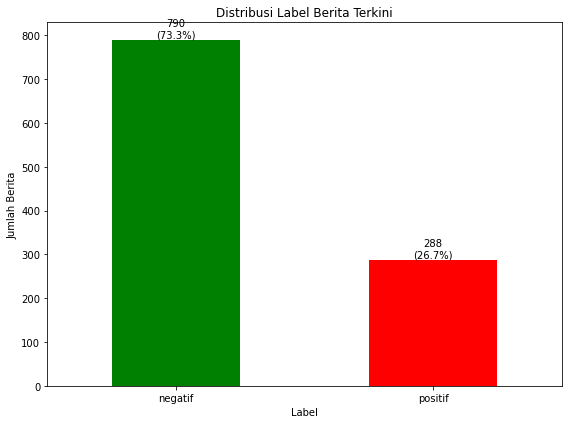

In [ ]:
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribusi Label Berita Terkini')
plt.xlabel('Label')
plt.ylabel('Jumlah Berita')
plt.xticks(rotation=0)

# Tambahkan jumlah dan persentase di atas batang
total = label_counts.sum()
for i, count in enumerate(label_counts):
    percentage = count / total * 100
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                xy=(i, count), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

KLASIFIKASI SENTIMEN MENGGUNAKAN GNB

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [3]:
# Load data berita terdahulu dan vektornya
df_old = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
with open(r'D:\SKRIPSI\skripsi_2025\doc_vectors_fasttext.pkl', "rb") as f:
    doc_vectors_old = pickle.load(f)

# Load data berita terkini dan vektornya
df_new = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\berita_terkini_dengan_label.csv')
with open(r'D:\SKRIPSI\skripsi_2025\doc_vectors_berita_terkini.pkl', "rb") as f:
    doc_vectors_new = pickle.load(f)
print(f"Data berita terdahulu: {len(df_old)} baris")
print(f"Data berita terkini: {len(df_new)} baris")

Data berita terdahulu: 1212 baris
Data berita terkini: 1078 baris


Akurasi model GNB pada data berita terdahulu: 0.6543

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.72      0.74      0.73       151
     positif       0.55      0.52      0.53        92

    accuracy                           0.65       243
   macro avg       0.63      0.63      0.63       243
weighted avg       0.65      0.65      0.65       243



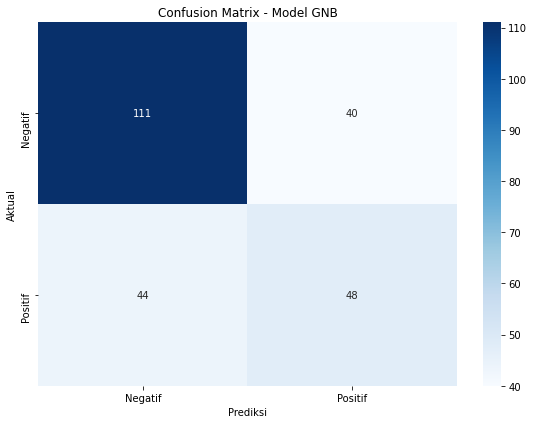

In [7]:
if 'label' in df_old.columns:
    label_col = 'label'
elif 'sentiment' in df_old.columns:
    label_col = 'sentiment'
else:
    label_col = 'predicted_label'
    print(f"PERINGATAN: Tidak menemukan kolom label standar. Menggunakan '{label_col}' sebagai kolom label.")

# Konversi label menjadi numerik
label_map = {'positif': 1, 'positive': 1, 'negatif': 0, 'negative': 0}
y_old = df_old[label_col].map(label_map).values

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    doc_vectors_old, y_old, test_size=0.2, random_state=42, stratify=y_old
)

# Latih model GNB dengan data training
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluasi model dengan data testing
y_pred = gnb.predict(X_test)

# Tampilkan hasil evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model GNB pada data berita terdahulu: {accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['negatif', 'positif']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    xticklabels=['Negatif', 'Positif'],
    yticklabels=['Negatif', 'Positif']
)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Model GNB')
plt.tight_layout()
plt.show()

In [9]:
# 3. Latih model GNB dengan seluruh data berita terdahulu
gnb_full = GaussianNB()
gnb_full.fit(doc_vectors_old, y_old)

# 4. Prediksi label berita terkini dengan GNB
y_pred_new_proba = gnb_full.predict_proba(doc_vectors_new)
y_pred_new = gnb_full.predict(doc_vectors_new)

# 5. Konversi hasil prediksi ke label teks
label_map_inv = {1: 'positif', 0: 'negatif'}
predicted_labels = [label_map_inv[pred] for pred in y_pred_new]

# Tambahkan hasil prediksi ke DataFrame
df_new['gnb_predicted_label'] = predicted_labels
df_new['gnb_confidence'] = np.max(y_pred_new_proba, axis=1)


Membandingkan hasil metode similarity dengan GNB...
Jumlah prediksi yang sama: 449 dari 1078 (41.65%)


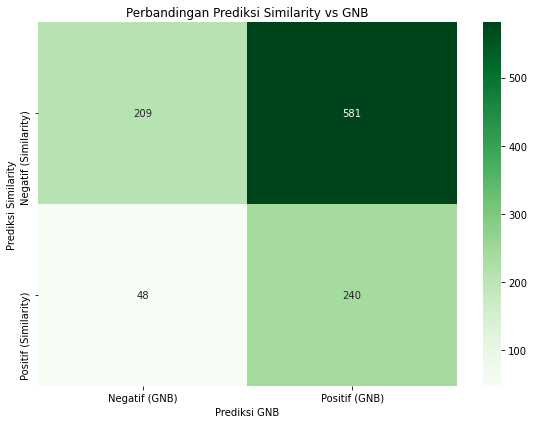

In [11]:
#6. Bandingkan dengan hasil metode similarity (dari FastText)
print("\nMembandingkan hasil metode similarity dengan GNB...")

# Konversi label hasil similarity ke numerik
y_sim = df_new['predicted_label'].map(label_map).values

# Hitung tingkat kesesuaian
agreement = (y_pred_new == y_sim).sum()
agreement_rate = agreement / len(y_sim) * 100

print(f"Jumlah prediksi yang sama: {agreement} dari {len(y_sim)} ({agreement_rate:.2f}%)")

# Buat confusion matrix perbandingan
cm_comparison = confusion_matrix(y_sim, y_pred_new)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_comparison, 
    annot=True, 
    fmt='d', 
    cmap='Greens',
    xticklabels=['Negatif (GNB)', 'Positif (GNB)'],
    yticklabels=['Negatif (Similarity)', 'Positif (Similarity)']
)
plt.xlabel('Prediksi GNB')
plt.ylabel('Prediksi Similarity')
plt.title('Perbandingan Prediksi Similarity vs GNB')
plt.tight_layout()
plt.show()

# Tambahkan kolom untuk menandai kesesuaian prediksi
df_new['prediction_match'] = y_pred_new == y_sim


In [12]:
if 'faktor_str' in df_new.columns:
    print("\nAnalisis kesesuaian prediksi berdasarkan faktor:")
    import ast
    
    # Konversi string list menjadi list Python
    df_new['faktor_list'] = df_new['faktor_str'].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x
    )
    
    # Daftar semua faktor
    all_faktors = set()
    for faktors in df_new['faktor_list']:
        if isinstance(faktors, list):
            all_faktors.update(faktors)
    
    # Untuk setiap faktor, hitung tingkat kesesuaian
    for faktor in all_faktors:
        # Filter berita dengan faktor tertentu
        has_factor = df_new['faktor_list'].apply(lambda x: faktor in x if isinstance(x, list) else False)
        faktor_df = df_new[has_factor]
        
        # Hitung kesesuaian
        if len(faktor_df) > 0:
            match_rate = faktor_df['prediction_match'].mean() * 100
            print(f"Faktor {faktor}: {match_rate:.2f}% kesesuaian ({len(faktor_df)} berita)")



Analisis kesesuaian prediksi berdasarkan faktor:
Faktor impor: 46.52% kesesuaian (374 berita)
Faktor ekspor: 54.69% kesesuaian (256 berita)
Faktor suku_bunga: 37.87% kesesuaian (668 berita)



Membuat ensemble dari hasil metode similarity dan GNB...

Distribusi Label Ensemble:
positif    659
negatif    419
Name: ensemble_predicted_label, dtype: int64


<Figure size 864x576 with 0 Axes>

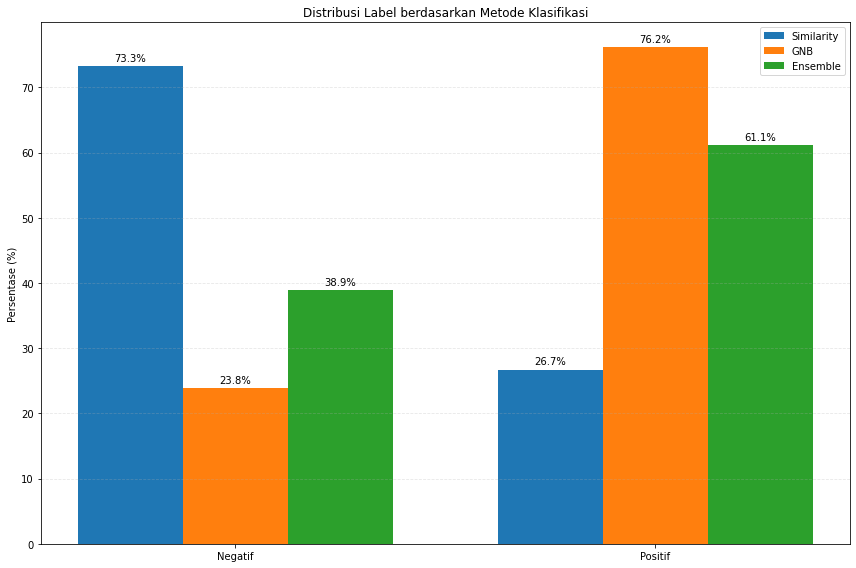

In [13]:
# 9. Gabungkan hasil prediksi (Ensemble)
print("\nMembuat ensemble dari hasil metode similarity dan GNB...")

# Konversi label ke numerik
df_new['sim_pred_num'] = df_new['predicted_label'].map(label_map)
df_new['gnb_pred_num'] = df_new['gnb_predicted_label'].map(label_map)

# Metode ensemble: voting dengan bobot confidence
# Asumsikan weight_sim dan weight_gnb = 0.5 (seimbang)
weight_sim = 0.5
weight_gnb = 0.5

# Hitung weighted vote untuk kelas positif
if 'top_sim_value' in df_new.columns:
    # Jika ada nilai similaritas, gunakan sebagai confidence untuk metode similarity
    df_new['weighted_vote_pos'] = (
        weight_sim * df_new['top_sim_value'] * df_new['sim_pred_num'] + 
        weight_gnb * df_new['gnb_confidence'] * df_new['gnb_pred_num']
    )
    
    # Hitung weighted vote untuk kelas negatif
    df_new['weighted_vote_neg'] = (
        weight_sim * df_new['top_sim_value'] * (1 - df_new['sim_pred_num']) + 
        weight_gnb * df_new['gnb_confidence'] * (1 - df_new['gnb_pred_num'])
    )
else:
    # Jika tidak ada nilai similaritas, asumsikan confidence 0.7 untuk semua
    df_new['weighted_vote_pos'] = (
        weight_sim * 0.7 * df_new['sim_pred_num'] + 
        weight_gnb * df_new['gnb_confidence'] * df_new['gnb_pred_num']
    )
    
    # Hitung weighted vote untuk kelas negatif
    df_new['weighted_vote_neg'] = (
        weight_sim * 0.7 * (1 - df_new['sim_pred_num']) + 
        weight_gnb * df_new['gnb_confidence'] * (1 - df_new['gnb_pred_num'])
    )

# Tentukan label final berdasarkan vote tertinggi
df_new['ensemble_pred_num'] = (df_new['weighted_vote_pos'] > df_new['weighted_vote_neg']).astype(int)
df_new['ensemble_predicted_label'] = df_new['ensemble_pred_num'].map(label_map_inv)

# Hitung confidence ensemble
df_new['ensemble_confidence'] = df_new[['weighted_vote_pos', 'weighted_vote_neg']].max(axis=1)

# Analisis hasil ensemble
print("\nDistribusi Label Ensemble:")
ensemble_counts = df_new['ensemble_predicted_label'].value_counts()
print(ensemble_counts)

# Visualisasi distribusi label dari ketiga metode
plt.figure(figsize=(12, 8))

# Data untuk plotting
label_methods = {
    'Similarity': df_new['predicted_label'].value_counts(),
    'GNB': df_new['gnb_predicted_label'].value_counts(),
    'Ensemble': df_new['ensemble_predicted_label'].value_counts()
}

# Normalisasi data
for method, counts in label_methods.items():
    label_methods[method] = counts / counts.sum() * 100

# Plot
width = 0.25
x = np.arange(2)  # 2 labels: negatif, positif

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - width, [label_methods['Similarity'].get('negatif', 0), label_methods['Similarity'].get('positif', 0)], width, label='Similarity')
rects2 = ax.bar(x, [label_methods['GNB'].get('negatif', 0), label_methods['GNB'].get('positif', 0)], width, label='GNB')
rects3 = ax.bar(x + width, [label_methods['Ensemble'].get('negatif', 0), label_methods['Ensemble'].get('positif', 0)], width, label='Ensemble')

ax.set_ylabel('Persentase (%)')
ax.set_title('Distribusi Label berdasarkan Metode Klasifikasi')
ax.set_xticks(x)
ax.set_xticklabels(['Negatif', 'Positif'])
ax.legend()

# Tambahkan label persentase di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [10]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py)

In [ ]:
# Load data (sesuaikan dengan path Anda)
df_old = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\fix_dataset\berita_terdahulu_grouping.csv')
with open(r'D:\SKRIPSI\skripsi_2025\doc_vectors_fasttext.pkl', "rb") as f:
    doc_vectors_old = pickle.load(f)

print(f"Data berita terdahulu: {len(df_old)} baris")

# Tentukan kolom label
if 'label' in df_old.columns:
    label_col = 'label'
elif 'sentiment' in df_old.columns:
    label_col = 'sentiment'
else:
    label_col = 'predicted_label'

# Konversi label menjadi numerik
label_map = {'positif': 1, 'positive': 1, 'negatif': 0, 'negative': 0}
y_old = df_old[label_col].map(label_map).values

# Cek distribusi kelas sebelum SMOTE
print("\nDistribusi kelas SEBELUM SMOTE:")
unique, counts = np.unique(y_old, return_counts=True)
for i, (cls, count) in enumerate(zip(['Negatif', 'Positif'], counts)):
    print(f"{cls}: {count} ({count/len(y_old)*100:.2f}%)")

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    doc_vectors_old, y_old, test_size=0.2, random_state=42, stratify=y_old
)

print(f"\nTraining set: {len(X_train)} sampel")
print(f"Testing set: {len(X_test)} sampel")

# Cek distribusi pada training set sebelum SMOTE
print("\nDistribusi pada TRAINING SET sebelum SMOTE:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for i, (cls, count) in enumerate(zip(['Negatif', 'Positif'], counts_train)):
    print(f"{cls}: {count} ({count/len(y_train)*100:.2f}%)")

# ==================== IMPLEMENTASI SMOTE ====================

# Inisialisasi SMOTE
# k_neighbors: jumlah tetangga terdekat untuk membuat synthetic samples
# random_state: untuk reproducibility
smote = SMOTE(k_neighbors=5, random_state=42)

# HANYA terapkan SMOTE pada data TRAINING
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"\nSetelah SMOTE:")
print(f"Training set: {len(X_train_smote)} sampel (sebelum: {len(X_train)})")

# Cek distribusi setelah SMOTE
print("\nDistribusi pada TRAINING SET setelah SMOTE:")
unique_smote, counts_smote = np.unique(y_train_smote, return_counts=True)
for i, (cls, count) in enumerate(zip(['Negatif', 'Positif'], counts_smote)):
    print(f"{cls}: {count} ({count/len(y_train_smote)*100:.2f}%)")

# ==================== TRAINING MODEL ====================

# Model 1: Tanpa SMOTE (untuk perbandingan)
print("\n" + "="*50)
print("MODEL TANPA SMOTE")
print("="*50)

gnb_original = GaussianNB()
gnb_original.fit(X_train, y_train)
y_pred_original = gnb_original.predict(X_test)

accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Akurasi (tanpa SMOTE): {accuracy_original:.4f}")
print("\nClassification Report (tanpa SMOTE):")
print(classification_report(y_test, y_pred_original, target_names=['Negatif', 'Positif']))

# Model 2: Dengan SMOTE
print("\n" + "="*50)
print("MODEL DENGAN SMOTE")
print("="*50)

gnb_smote = GaussianNB()
gnb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = gnb_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Akurasi (dengan SMOTE): {accuracy_smote:.4f}")
print("\nClassification Report (dengan SMOTE):")
print(classification_report(y_test, y_pred_smote, target_names=['Negatif', 'Positif']))

# ==================== VISUALISASI PERBANDINGAN ====================

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix - Tanpa SMOTE
cm_original = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'], 
            yticklabels=['Negatif', 'Positif'], ax=axes[0])
axes[0].set_title('Confusion Matrix - Tanpa SMOTE')
axes[0].set_xlabel('Prediksi')
axes[0].set_ylabel('Aktual')

# Confusion Matrix - Dengan SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negatif', 'Positif'], 
            yticklabels=['Negatif', 'Positif'], ax=axes[1])
axes[1].set_title('Confusion Matrix - Dengan SMOTE')
axes[1].set_xlabel('Prediksi')
axes[1].set_ylabel('Aktual')

plt.tight_layout()
plt.show()

# Visualisasi Distribusi Data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Data Original
original_counts = [counts_train[0], counts_train[1]]
axes[0].bar(['Negatif', 'Positif'], original_counts, color=['red', 'green'], alpha=0.7)
axes[0].set_title('Training Set - Sebelum SMOTE')
axes[0].set_ylabel('Jumlah Sampel')
for i, count in enumerate(original_counts):
    axes[0].text(i, count + 5, str(count), ha='center', va='bottom')

# Data Setelah SMOTE
smote_counts = [counts_smote[0], counts_smote[1]]
axes[1].bar(['Negatif', 'Positif'], smote_counts, color=['red', 'green'], alpha=0.7)
axes[1].set_title('Training Set - Setelah SMOTE')
axes[1].set_ylabel('Jumlah Sampel')
for i, count in enumerate(smote_counts):
    axes[1].text(i, count + 10, str(count), ha='center', va='bottom')

# Perbandingan Akurasi
accuracies = [accuracy_original, accuracy_smote]
methods = ['Tanpa SMOTE', 'Dengan SMOTE']
bars = axes[2].bar(methods, accuracies, color=['orange', 'blue'], alpha=0.7)
axes[2].set_title('Perbandingan Akurasi')
axes[2].set_ylabel('Akurasi')
axes[2].set_ylim(0, 1)

# Tambahkan nilai akurasi di atas bar
for bar, acc in zip(bars, accuracies):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ==================== PREDIKSI BERITA TERKINI ====================

# Load data berita terkini
df_new = pd.read_csv(r'D:\SKRIPSI\skripsi_2025\berita_terkini_dengan_label.csv')
with open(r'D:\SKRIPSI\skripsi_2025\doc_vectors_berita_terkini.pkl', "rb") as f:
    doc_vectors_new = pickle.load(f)

print(f"\nData berita terkini: {len(df_new)} baris")

# Prediksi dengan model yang telah dilatih dengan SMOTE
y_pred_new_smote = gnb_smote.predict(doc_vectors_new)
y_pred_new_proba_smote = gnb_smote.predict_proba(doc_vectors_new)

# Konversi hasil prediksi ke label teks
label_map_inv = {1: 'positif', 0: 'negatif'}
predicted_labels_smote = [label_map_inv[pred] for pred in y_pred_new_smote]

# Tambahkan rezultat ke DataFrame
df_new['gnb_smote_predicted_label'] = predicted_labels_smote
df_new['gnb_smote_confidence'] = np.max(y_pred_new_proba_smote, axis=1)

# Analisis hasil prediksi
print("\nDistribusi prediksi berita terkini (dengan SMOTE):")
smote_pred_counts = pd.Series(predicted_labels_smote).value_counts()
print(smote_pred_counts)

# Bandingkan dengan prediksi GNB tanpa SMOTE (jika ada)
if 'gnb_predicted_label' in df_new.columns:
    print("\nPerbandingan prediksi GNB:")
    comparison_df = pd.DataFrame({
        'Tanpa_SMOTE': df_new['gnb_predicted_label'].value_counts(),
        'Dengan_SMOTE': pd.Series(predicted_labels_smote).value_counts()
    }).fillna(0)
    print(comparison_df)
    
    # Hitung agreement rate
    agreement = (df_new['gnb_predicted_label'] == df_new['gnb_smote_predicted_label']).sum()
    agreement_rate = agreement / len(df_new) * 100
    print(f"\nTingkat kesesuaian prediksi: {agreement}/{len(df_new)} ({agreement_rate:.2f}%)")

# Simpan hasil
output_file = 'berita_terkini_dengan_smote_label.csv'
output_columns = ['title', 'content', 'stemmed_text', 'faktor_str', 'gnb_smote_predicted_label', 'gnb_smote_confidence', 'date']
df_new[output_columns].to_csv(output_file, index=False)
print(f"\nHasil disimpan ke: {output_file}")

# ==================== TIPS TAMBAHAN ====================

print("\n" + "="*60)
print("TIPS UNTUK MENINGKATKAN PERFORMA:")
print("="*60)
print("1. Coba berbagai parameter SMOTE:")
print("   - k_neighbors: 3, 5, 7")
print("   - sampling_strategy: 'auto', 0.8, 0.5")
print("2. Gunakan teknik oversampling lain:")
print("   - ADASYN, BorderlineSMOTE, SVMSMOTE")
print("3. Kombinasi dengan undersampling:")
print("   - SMOTETomek, SMOTEENN")
print("4. Tuning hyperparameter Naive Bayes:")
print("   - var_smoothing parameter")
print("5. Coba algoritma lain:")
print("   - Random Forest, SVM, XGBoost")

ImportError: cannot import name sp_base_version